In [1]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.keras.models import load_model

In [3]:
import tensorflow as tf

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=200)

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

In [5]:
categories = ["20-29", "30-39", "40-49", "50-59"]
model = load_model("new_resnet50ImageModel.h5")
data_dir = "Dataset/Test/50-59/"
files_to_predict = os.listdir(data_dir)

In [6]:
input_shape = 320
batch_size = 16
image_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_image_gen = image_gen.flow_from_directory('Dataset/Train',
                                                target_size=(input_shape, input_shape),
                                                batch_size=batch_size,
                                                class_mode='categorical')
test_image_gen = image_gen.flow_from_directory('Dataset/Test',
                                               target_size=(input_shape, input_shape),
                                               batch_size=1,
                                               class_mode='categorical')

Found 743 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


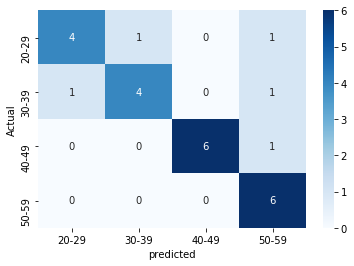

test_acc= 80.0


In [7]:
import pandas as pd
import seaborn as sn

filenames = test_image_gen.filenames
nb_samples = len(test_image_gen)
y_prob = []
y_act = []
test_image_gen.reset()
for _ in range(nb_samples):
  x_test, y_test = test_image_gen.next()
  y_prob.append(model.predict(x_test))
  y_act.append(y_test)

predicted_class = [list(train_image_gen.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_image_gen.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df["predicted_class"], rownames=["Actual"], colnames=["predicted"])
sn.heatmap(confusion_matrix, cmap="Blues", annot=True, fmt='d')

plt.show()

print("test_acc= {}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [8]:
import os
test_dir = "Dataset/Test/50-59/"
files_to_predict = os.listdir(test_dir)
for file in files_to_predict:
    Image_path = data_dir + file
    new_image = tf.keras.preprocessing.image.load_img(Image_path, target_size=(320, 320))
    new_image = tf.keras.preprocessing.image.img_to_array(new_image)
    new_image = np.expand_dims(new_image, axis=0)
    prediction = model.predict(new_image)
    print(categories[np.argmax(prediction)])

50-59
50-59
50-59
50-59
50-59
50-59


In [9]:
test_acc = (np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)

In [10]:
test_acc

80.0

In [11]:
from sklearn.metrics import f1_score

In [12]:
new_prob = []
for i in y_prob:
    new_prob.append(np.argmax(i))

In [13]:
new_act = []
for i in y_act:
    new_act.append(np.argmax(i))

In [14]:
new_act

[0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 0, 3, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 3]

In [15]:
print(len(new_prob))
print(len(new_act))

25
25


In [48]:
fiscore = f1_score(new_act, new_prob, average='macro')

In [49]:
from sklearn.metrics import precision_score

In [50]:
preciesion = precision_score(new_act, new_prob, average="macro")

In [20]:
train_image_gen = image_gen.flow_from_directory('Dataset/Train',
                                                target_size=(input_shape, input_shape),
                                                batch_size=batch_size,
                                                class_mode='categorical')

test_cat1_image_gen = image_gen.flow_from_directory('New folder (2)/cat1',
                                                    target_size=(input_shape, input_shape),
                                                    batch_size=1,
                                                    class_mode='categorical')

test_cat2_image_gen = image_gen.flow_from_directory('New folder (2)/cat2',
                                                    target_size=(input_shape, input_shape),
                                                    batch_size=1,
                                                    class_mode='categorical')
test_cat3_image_gen = image_gen.flow_from_directory('New folder (2)/cat3',
                                                    target_size=(input_shape, input_shape),
                                                    batch_size=1,
                                                    class_mode='categorical')
test_cat4_image_gen = image_gen.flow_from_directory('New folder (2)/cat4',
                                                    target_size=(input_shape, input_shape),
                                                    batch_size=1,
                                                    class_mode='categorical')

Found 743 images belonging to 4 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


In [21]:
def GenerateAcc(test_image_gen):
    filenames = test_image_gen.filenames
    nb_samples = len(test_image_gen)
    y_prob = []
    y_act = []
    test_image_gen.reset()
    for _ in range(nb_samples):
        x_test, y_test = test_image_gen.next()
        y_prob.append(model.predict(x_test))
        y_act.append(y_test)
    predicted_class = [list(train_image_gen.class_indices.keys())[i.argmax()] for i in y_prob]
    actual_class = [list(train_image_gen.class_indices.keys())[i.argmax()] for i in y_act]
    out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
    confusion_matrix = pd.crosstab(out_df['actual_class'], out_df["predicted_class"], rownames=["Actual"],
                                   colnames=["predicted"])
    # sn.heatmap(confusion_matrix, cmap="Blues", annot=True, fmt='d')
    # plt.show()
    # print("test_acc= {}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))
    test_acc = int((np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100))
    return test_acc


#
#
test1 = GenerateAcc(test_cat1_image_gen)
test2 = GenerateAcc(test_cat2_image_gen)
test3 = GenerateAcc(test_cat3_image_gen)
test4 = GenerateAcc(test_cat4_image_gen)

print(test1)
print(test2)
print(test3)
print(test4)

66
66
85
100


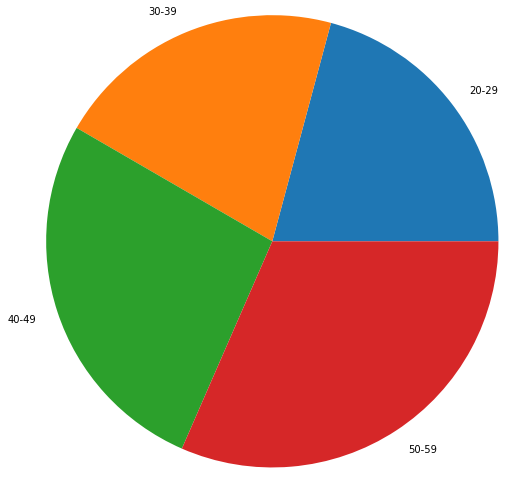

In [25]:
y = np.array([test1, test2, test3, test4])
mylabels = ["20-29", "30-39", "40-49", "50-59"]

plt.pie(y, labels=mylabels, radius=2.6)
plt.show()

In [51]:
from sklearn.metrics import recall_score

In [52]:
recall = recall_score(new_act, new_prob, average="macro")


In [53]:
recall = int(recall * 100)
preciesion = int(preciesion * 100)
fiscore = int(fiscore * 100)

In [54]:
print(recallss)
print(preciesiona)
print(fiscoree)
print(test_acc)

7900
81000000
79000000
80.0


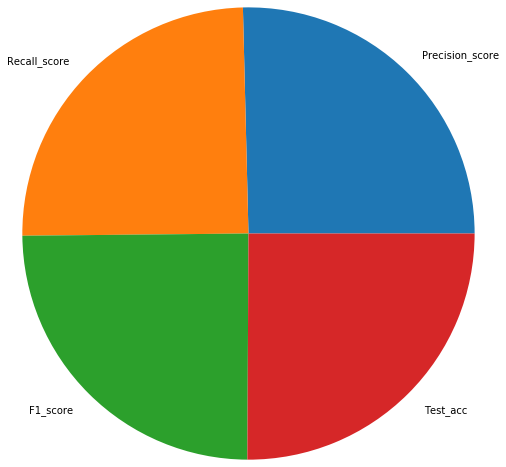

In [55]:
evaluation = np.array([81, 79, 79, test_acc])
mylabels = ["Precision_score", "Recall_score", "F1_score", "Test_acc"]

plt.pie(evaluation, labels=mylabels, radius=2.6)
plt.show()